In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
uber_15 = pd.read_csv(r'C:\Users\Lenovo\Desktop\all Dataset for analysis\Uber Data analysis\data/uber-raw-data-janjune-15.csv')

In [88]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [89]:
type(uber_15)

pandas.core.frame.DataFrame

In [90]:
uber_15.duplicated().sum()

898225

In [91]:
uber_15.drop_duplicates(inplace=True)

In [7]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [92]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%dT%H:%M:%S')

In [93]:
uber_15['Pickup_date'].dtypes

dtype('<M8[ns]')

In [94]:
uber_15['month'] = uber_15['Pickup_date'].dt.month

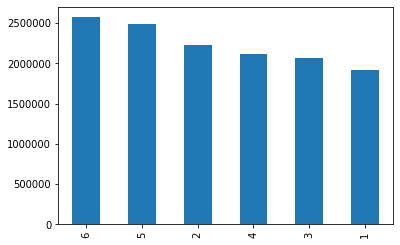

In [95]:
uber_15['month'].value_counts().plot(kind='bar')

-----Finding total trips for each month adn each weekdays

In [96]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['month'] = uber_15['Pickup_date'].dt.month
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [97]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47


In [134]:
# Create a Series object with the size of each group
temp = uber_15.groupby(['month', "weekday"]).size()


In [135]:
# Convert the Series to a DataFrame
temp_df = temp.to_frame()

# Rename the column to 'size'
temp_df.columns = ['size']
temp_df.head(5)

size
month weekday         
1     Friday    339285
      Monday    190606
      Saturday  386049
      Sunday    230487
      Thursday  330319

In [138]:
temp_df.reset_index(inplace=True)
temp_df.head(5)

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


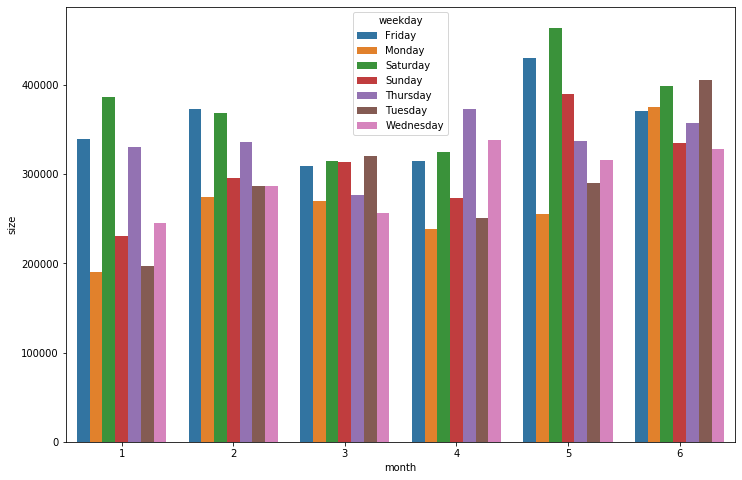

In [141]:
# monthly and weekly demand 
plt.figure(figsize=(12,8))
sns.barplot(x='month', y='size', hue='weekday', data=temp_df)

In [150]:
#weekly and hourly count
weeekHour_temp = uber_15.groupby(['weekday', 'hour']).size()
weekHour_df = weeekHour_temp.to_frame()
weekHour_df.head(5)

0
weekday hour       
Friday  0     79879
        1     44563
        2     27252
        3     19076
        4     23049

In [151]:
weekHour_df.columns = ['size']
weekHour_df.head(5)

size
weekday hour       
Friday  0     79879
        1     44563
        2     27252
        3     19076
        4     23049

In [152]:
weekHour_df.reset_index(inplace=True)
weekHour_df.head(5)

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049


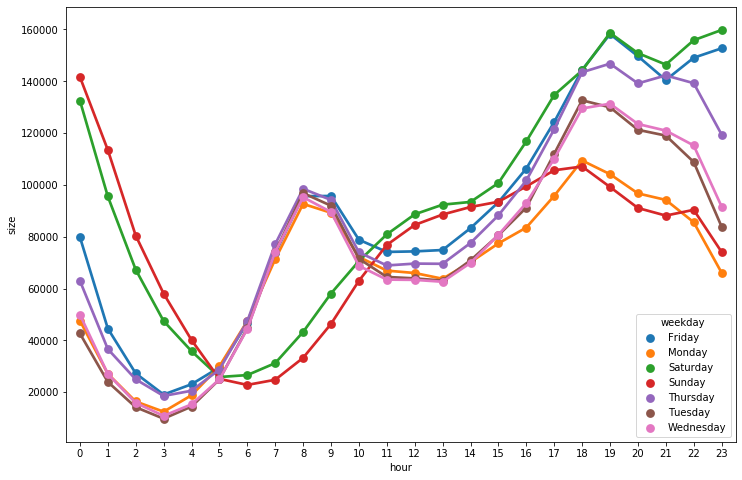

In [154]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour', y='size',hue='weekday', data=weekHour_df)